In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### **Prepare Dataset of Gala Apple**

In [88]:
df_gala = pd.read_csv("../../../DataSet/Gala/gala.csv")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Gala    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [89]:
df_gala["Date"] = pd.to_datetime(df_gala["Date"], format="%d/%m/%Y")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Gala    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


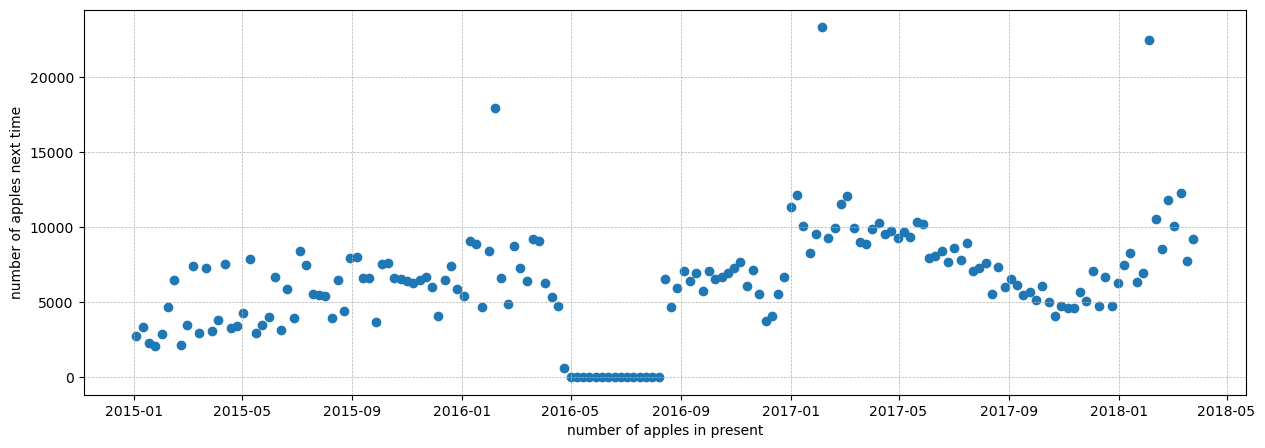

In [90]:
plt.figure(figsize=(15,5))
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

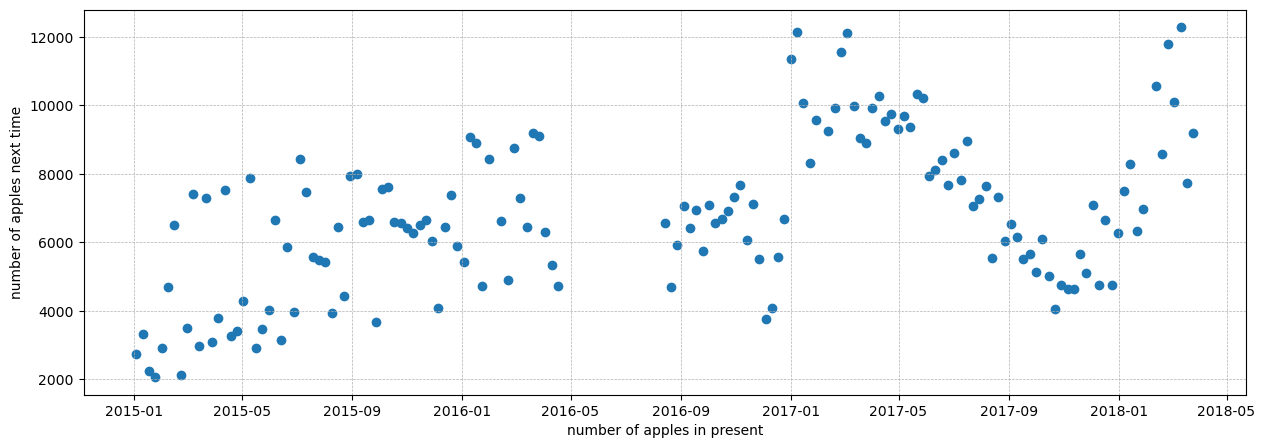

In [91]:
df_gala = df_gala[df_gala["Gala"] <= 15000]
df_gala = df_gala[df_gala["Gala"] >= 1000]

plt.figure(figsize=(15,5))
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [92]:
df_gala["y"] = df_gala["Gala"].shift(-1)
df_gala.dropna(inplace=True)
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    149 non-null    datetime64[ns]
 1   Gala    149 non-null    int64         
 2   y       149 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.7 KB


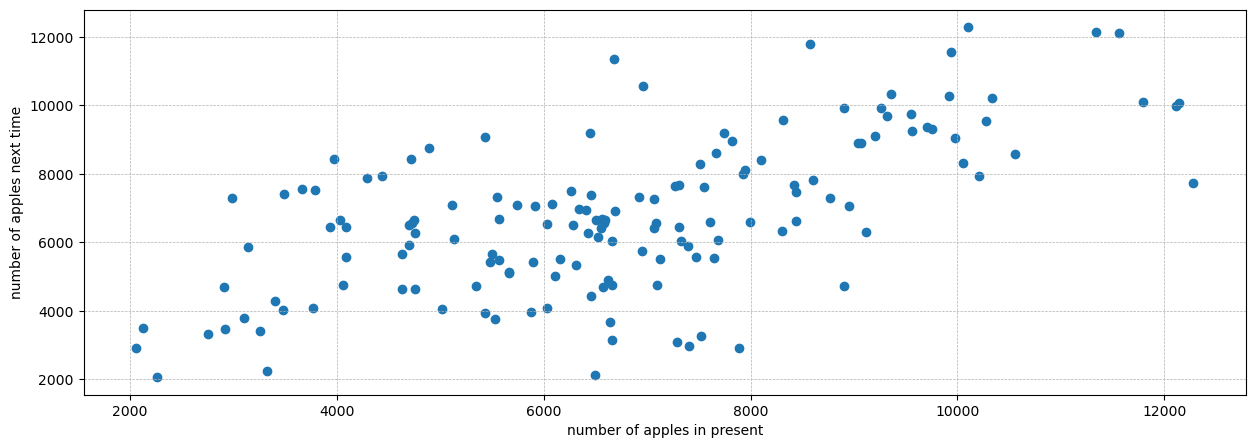

In [93]:
plt.figure(figsize=(15,5))
plt.scatter(df_gala["Gala"], df_gala["y"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [94]:
x = np.array(df_gala.drop(columns="y"))
y = np.array(df_gala.drop(columns="Gala"))

In [95]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

### **Train Model of Gala apple**

In [96]:
# def findBestRandomState(r,t, x, y):
#     xScaler = StandardScaler().fit(x)
#     yScaler = StandardScaler().fit(y)
#     x = xScaler.transform(x)
#     y = yScaler.transform(y)
    
#     random = 0
#     a = 100

#     model = RegressorChain(GradientBoostingRegressor())
#     for _ in range(r,t):
#         x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
#         model.fit(x_train, y_train)

#         y_predict = model.predict(x_test)
#         if (buff := mean_absolute_error(y_test, y_predict)) < a:
#             a = buff
#             random = _
#     print(a, random)

# findBestRandomState(0, 100000, x[:, 1:], y[:, 1:])

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=63405)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

model = RegressorChain(GradientBoostingRegressor(learning_rate=0.025))
model.fit(x_train[:, 1:], y_train[:, 1:])

RegressorChain(base_estimator=GradientBoostingRegressor(learning_rate=0.025))

### ***Predict from test_dataset Of Gala***

In [98]:
y_predict = model.predict(x_test[:, 1:])
mae = mean_absolute_error(y_test[:, 1:], y_predict)
mse = mean_squared_error(y_test[:, 1:], y_predict)
r2 = r2_score(y_test[:, 1:], y_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")

print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("GradientBoosting",mae,mse,r2,mape,"evaluate.csv")

Mean Absolute Error: 852.7458392385919
Mean Square Error: 1151359.5322168334
R2 score: 0.6278390383469697
Mean Absolute Percentage Error: 0.14418863889972425


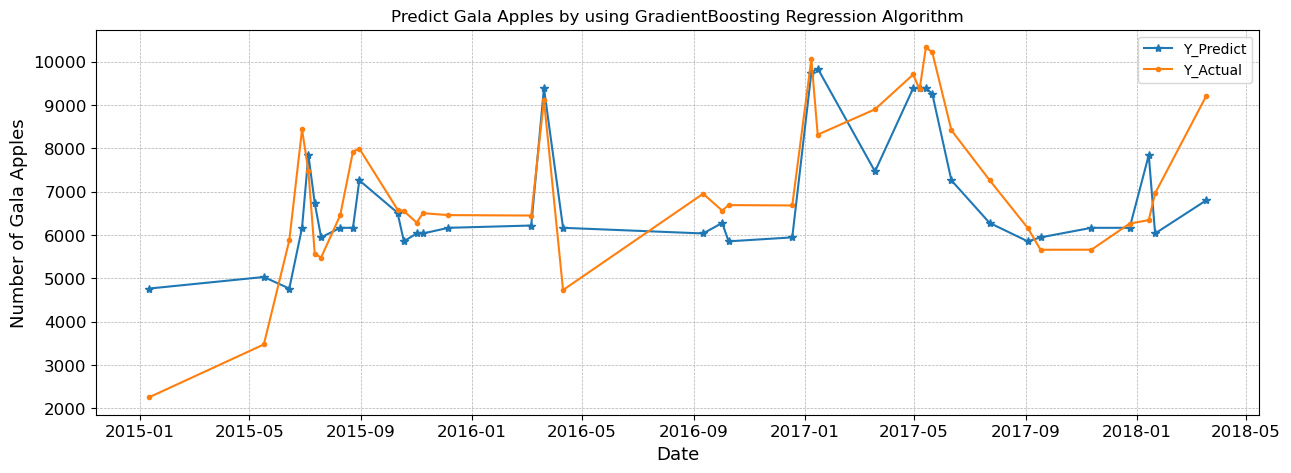

In [99]:
plt.figure(figsize=(15, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x_test[:, :1], y_predict, label="Y_Predict", marker="*")
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual", marker=".")
plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Gala Apples", fontsize=13)
plt.title("Predict Gala Apples by using GradientBoosting Regression Algorithm")
plt.grid(linestyle='--', linewidth=0.5)
plt.legend()
plt.show()